In [363]:
%reset -f
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('seaborn')
%matplotlib inline

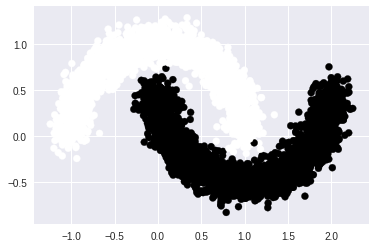

In [364]:
X,y = datasets.make_moons(n_samples=5000, 
                          shuffle=True, 
                          noise=0.1, 
                          random_state=1234)
Y = np.reshape(y, (len(y),1))

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


In [365]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.l1 = torch.nn.Linear(2, 3)
        self.l2 = torch.nn.Linear(3, 3)
        self.l3 = torch.nn.Linear(3, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        out3 = self.sigmoid(self.l3(out2))
        return out3   


In [366]:
model = NeuralNetwork()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device
model.to(device)

NeuralNetwork(
  (l1): Linear(in_features=2, out_features=3, bias=True)
  (l2): Linear(in_features=3, out_features=3, bias=True)
  (l3): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [367]:
inputs = torch.tensor(X, dtype=torch.float).to(device='cuda')
labels = torch.tensor(y, dtype=torch.float).to(device='cuda')

In [368]:
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

/home/joshhu/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [369]:
#store all the loss values
losses = []

In [370]:
for epoch in range(10000):
    y_pred = model(inputs)
    loss = criterion(y_pred, labels)
    losses.append(loss)
    if not epoch%500: print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/home/joshhu/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([5000])) that is different to the input size (torch.Size([5000, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


0 0.6935129165649414
500 0.0024573300033807755
1000 0.0020688639488071203
1500 0.0018585857469588518
2000 0.0016885221702978015
2500 0.0015455186367034912
3000 0.0014464681735262275
3500 0.0013419156894087791
4000 0.0011989895720034838
4500 0.001043956377543509
5000 0.0009280603262595832
5500 0.0008418672368861735
6000 0.0007790570962242782
6500 0.0007344504119828343
7000 0.0007244340376928449
7500 0.0007029264234006405
8000 0.0006849287310615182
8500 0.0006684366380795836
9000 0.0006523908814415336
9500 0.0006357741076499224


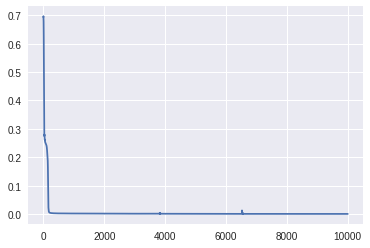

In [371]:
plt.plot(losses)

tensor([[1.]], device='cuda:0', grad_fn=<SigmoidBackward>)


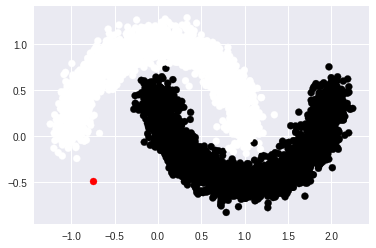

In [393]:
test = torch.randn(1,2, dtype=torch.float).to(device='cuda')
print(model.forward(test))
test2 = test.cpu().numpy()
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(test2[0][0], test2[0][1],c='red')
plt.show()

In [394]:
import math
z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
z_exp = [math.exp(i) for i in z]  
print(z_exp)  # Result: [2.72, 7.39, 20.09, 54.6, 2.72, 7.39, 20.09] 
sum_z_exp = sum(z_exp)  
print(sum_z_exp)  # Result: 114.98 
softmax = [round(i / sum_z_exp, 3) for i in z_exp]
print(softmax)  #

[2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 2.718281828459045, 7.38905609893065, 20.085536923187668]
114.98389973429897
[0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]
